In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('/Volumes/workspace/default/netflix/netflix_titles_cleaned_file.csv')
print(df.dtypes)
print(df.isnull().sum())

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


# Content Length Category

In [0]:
# Creating a new column content_length_category on basis of the duration of the content. 
def content_length(row):
    if row['type'] == 'Movie':
        if 'min' in row['duration']:
            minutes = int(row['duration'].replace(' min', '').strip())
            if minutes <= 60:
                return 'Short'
            elif minutes <= 120:
                return 'Medium'
            else:
                return 'Long'
        else:
            return 'Unknown'
    elif row['type'] == 'TV Show':
        if 'Season' in row['duration']:
            seasons = int(row['duration'].split()[0])
            if seasons == 1:
                return 'Single Season'
            elif seasons <= 4:
                return 'Few Seasons'
            else:
                return 'Multi Seasons'
        else:
            return 'Unknown'
    else:
        return 'Unknown'
    
df['Content_length_category'] = df.apply(content_length, axis=1)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Content_length_category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Medium
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International Tv Shows, Tv Dramas, Tv Mysteries","After crossing paths at a party, a Cape Town t...",Few Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime Tv Shows, International Tv Shows, Tv Act...",To protect his family from a powerful drug lor...,Single Season
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality Tv","Feuds, flirtations and toilet talk go down amo...",Single Season
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International Tv Shows, Romantic Tv Shows, Tv ...",In a city of coaching centers known to train I...,Few Seasons


# Title length Category

In [0]:
# Creating a new column named 'content_length_category' based on the length of the title column.
def categorize_by_title_length(row):
    title_length = len(str(row['title']))
    if title_length < 10:
        return 'Very Short'
    elif title_length < 20:
        return 'Short'
    elif title_length < 40:
        return 'Medium'
    else:
        return 'Long'
    
df['title_length_category'] = df.apply(categorize_by_title_length, axis=1)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Content_length_category,title_length_category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Medium,Medium
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International Tv Shows, Tv Dramas, Tv Mysteries","After crossing paths at a party, a Cape Town t...",Few Seasons,Short
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime Tv Shows, International Tv Shows, Tv Act...",To protect his family from a powerful drug lor...,Single Season,Very Short
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality Tv","Feuds, flirtations and toilet talk go down amo...",Single Season,Medium
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International Tv Shows, Romantic Tv Shows, Tv ...",In a city of coaching centers known to train I...,Few Seasons,Short


# Original vs Licenced Content 

In [0]:
# Creating a new column named is_original based on the title column.
df['is_original'] = df['title'].apply(lambda x: 'Original' if 'Netflix' in str(x) else 'Licensed')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Content_length_category,title_length_category,is_original
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Medium,Medium,Licensed
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International Tv Shows, Tv Dramas, Tv Mysteries","After crossing paths at a party, a Cape Town t...",Few Seasons,Short,Licensed
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime Tv Shows, International Tv Shows, Tv Act...",To protect his family from a powerful drug lor...,Single Season,Very Short,Licensed
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality Tv","Feuds, flirtations and toilet talk go down amo...",Single Season,Medium,Licensed
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International Tv Shows, Romantic Tv Shows, Tv ...",In a city of coaching centers known to train I...,Few Seasons,Short,Licensed


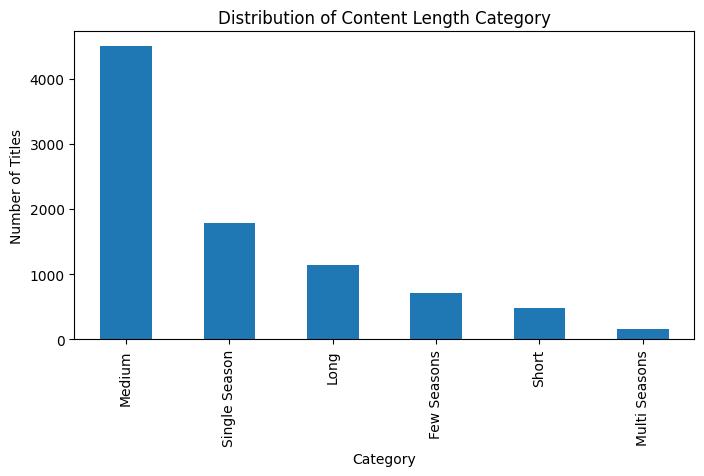

In [0]:

# Content Length Category
plt.figure(figsize=(8,4))
df['Content_length_category'].value_counts().plot(kind='bar')
plt.title("Distribution of Content Length Category", fontsize=12)
plt.xlabel("Category")
plt.ylabel("Number of Titles")
plt.show()


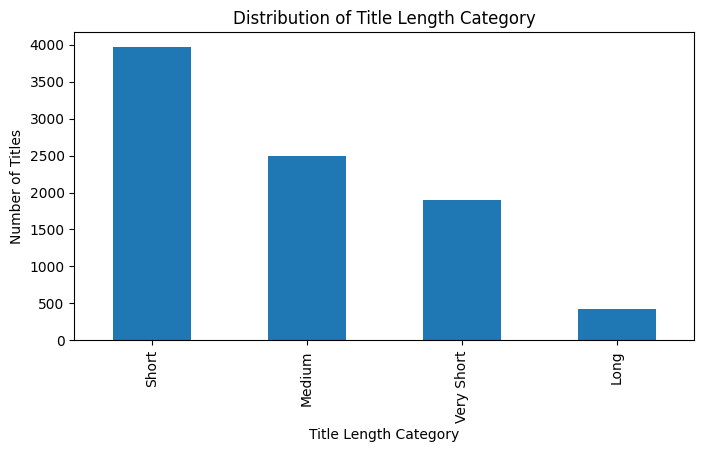

In [0]:
# Title Length Category
plt.figure(figsize=(8,4))
df['title_length_category'].value_counts().plot(kind='bar')
plt.title("Distribution of Title Length Category", fontsize=12)
plt.xlabel("Title Length Category")
plt.ylabel("Number of Titles")
plt.show()

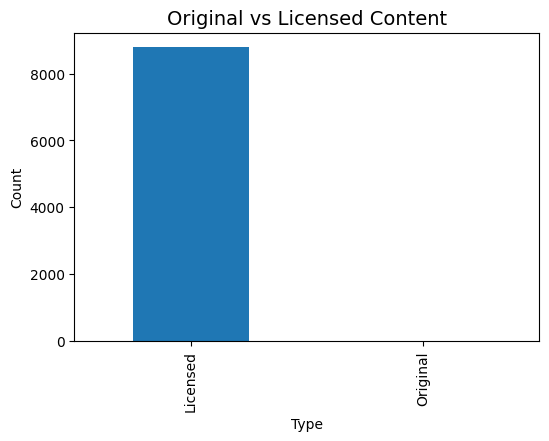

In [0]:
# Original vs Licensed
plt.figure(figsize=(6,4))
df['is_original'].value_counts().plot(kind='bar')
plt.title("Original vs Licensed Content", fontsize=14)
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

# Audience Age Group

In [0]:
## Creating new column named Audience_Age_Group based on the rating column.

audience_age_group = {
    'TV-Y': 'Kids',
    'TV-Y7': 'Kids',
    'TV-G': 'Kids',
    'G': 'Kids',
    'TV-PG': 'Teenagers',
    'PG': 'Teenagers',
    'PG-13': 'Teenagers',
    'TV-14': 'Adults',
    'R': 'Adults',
    'TV-MA': 'Adults',
    'NC-17': 'Adults',
    'NR': 'Unknown',
    'Unknown': 'Unknown'
}

df['Audience_Age_Group'] = df['rating'].map(age_group).fillna('Unknown')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Content_length_category,title_length_category,is_original,Audience_Age_Group
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Medium,Medium,Licensed,Teenagers
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International Tv Shows, Tv Dramas, Tv Mysteries","After crossing paths at a party, a Cape Town t...",Few Seasons,Short,Licensed,Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime Tv Shows, International Tv Shows, Tv Act...",To protect his family from a powerful drug lor...,Single Season,Very Short,Licensed,Adults
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality Tv","Feuds, flirtations and toilet talk go down amo...",Single Season,Medium,Licensed,Adults
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International Tv Shows, Romantic Tv Shows, Tv ...",In a city of coaching centers known to train I...,Few Seasons,Short,Licensed,Adults


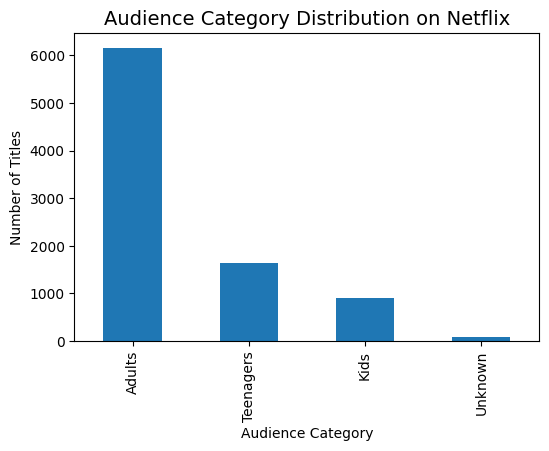

In [0]:
# Audience Category Distribution

audience_counts = df['Audience_Age_Group'].value_counts()
audience_percent = round((audience_counts / audience_counts.sum()) * 100, 1)

plt.figure(figsize=(6,4))
audience_counts.plot(kind='bar')
plt.title("Audience Category Distribution on Netflix", fontsize=14)
plt.xlabel("Audience Category")
plt.ylabel("Number of Titles")
plt.show()